# Module 13 - Random Numbers and  Random Number Generators


## Goals

- Generation and testing of pseudorandom numbers
- Sampling a distribution


## Setting up the Notebook

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Generation of Random Numbers

### What is a random number?

- There is really no such thing, definitely not on a deterministic classical computer
- Loose term applied to a sequence of independent numbers drawn randomly from some distribution
- Typically we select integer or real values on some finite domain

What of the simplest ways to generate uniformly distrubted random numbers on $[0,1]$ is the **Linear Congruential Generator** (LCG).

Consider the map (recursion relation) which generates integers between $0$ and $m-1$:

\begin{equation}
X_{n+1} = (a X_n + c) \mod m
\end{equation}

where $a$ is known as the multiplier, $c$ is the increment and $m$ the modulus.  Starting from an initial **seed** value $X_0$ we generate the list of numbers:

\begin{align*}
X_0 &= \text{seed} \newline
X_1 &= (a X_0 + c) \mod m \newline
X_2 &= \{a [a (X_0 + c) \mod m] + c\} \mod m \newline
\vdots &
\end{align*}

Then, a uniform number $x_n \in \mathcal{U}_{[0,1]}$ can be computed as:

\begin{equation}
x_n = \frac{X_n}{m} .
\end{equation}




<div class="span alert alert-success">
<h2>Programming challenge </h2>
Write a LCG function with $a=16807$, $c=0$, $m=2^{31}-1$ and $seed=332$ that generates a list of *pseudorandom* uniform numbers of length $N=1000$ on [0,1].
</div>

<!--
    m = 2**32-1
    a = 6
    c = 7
    U = 3
-->

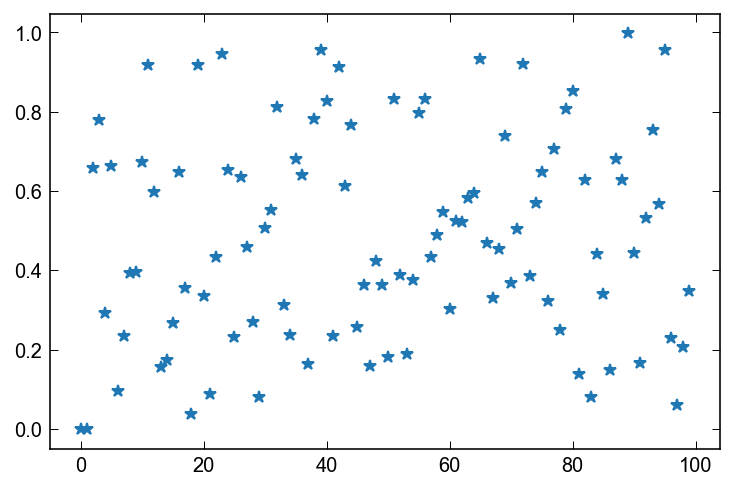

In [2]:
def lcg_rand(a,c,m,seed,N=1):
    '''A linear congruential pseudrandom number generator'''
    x = np.zeros([N])
    X = seed
    x[0] = X/m
    for n in range(N-1):
        X = (a*X + c) % m
        x[n+1] = X/m
    return x

N = 100
a = 16807
c = 0
m = 2**31-1
seed = 5
x = lcg_rand(a,c,m,seed,N)
plt.figure()
plt.plot(x, '*')

We can test for uniformity by examining a histogram

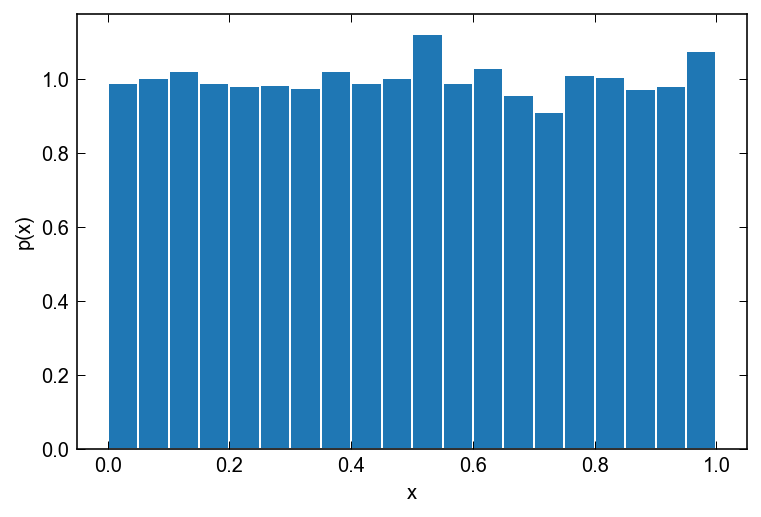

In [3]:
# the histogram of the data
N = 10000
a = 16807
c = 0
m = 2**31-1
seed = 332
x = lcg_rand(a,c,m,seed,N)
plt.figure()
plt.hist(x, 20, normed=1, ec='w')
plt.xlabel('x')
plt.ylabel('p(x)')

## Optimal Values for the LCG

1. $c$ is relatively prime to m
2. $b=a-1$ is a multiple of $p$ for every prime number $p$ dividing $m$
3. $b$ is a multiple of 4 if $m$ is a multiple of 4

Numerical Recipes suggests:

\begin{align*}
a &= 1664525 \newline
c &= 1013904223 \newline
m &= 2^{32}
\end{align*}

We can also test the overall statistics (but not correlations) by looking at the mean and variance over the uniform probability distribution $p(x) = 1$.

\begin{equation}
\langle x \rangle = \mu = \int_0^1 p(x) x dx 
= \int_0^1 x dx 
= \left. \frac{x^2}{2}\right \rvert_0^1 
= \frac{1}{2}
\end{equation}

\begin{equation}
\sigma^2 = \langle(x-\mu)^2\rangle = \int_0^1 \left(x-\frac{1}{2}\right)^2 dx =  \int_0^1 \left(x^2 - x +\frac{1}{4}\right) dx
= \frac{1}{3} - \frac{1}{2} + \frac{1}{4} = \frac{1}{12}
\end{equation}

so $\sigma = \frac{1}{\sqrt{12}} \simeq 0.2886$

In [4]:
a,c,m,seed = 1664525,1013904223,2**32,13523
x = lcg_rand(a,c,m,seed,10000)

print(np.average(x),np.std(x))

0.50449334808 0.289062854736


We can also visually inspect for correlations by plotting $x_i vs. x_{i+1}$

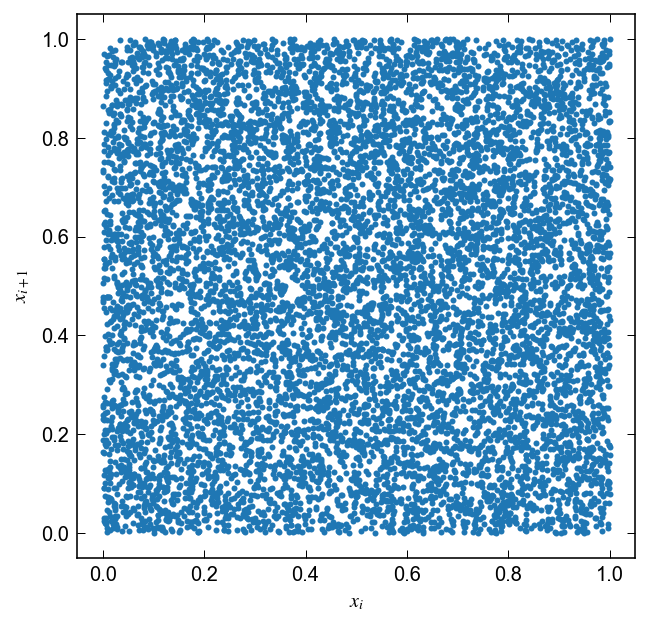

In [5]:
plt.figure(figsize=(5,5))
plt.plot(x[:-1],x[1:],'o', ms=3, mew=0)
plt.xlabel(r'$x_i$')
plt.ylabel(r'$x_{i+1}$')

## Random Sampling of a Distribution

We can use the uniform distribution of (pseudo) random numbers in many ways, including sampling $N$ discrete events or a continuous distribution, each with their own probabilities $p_0,p_1,\ldots,p_{N-1}$.  Since something *must* happen, we know

\begin{equation}
\sum_{i=0}^{n-1} p_i = 1
\end{equation}

We can use our uniformly distributed random numbers $x\in \mathcal{U}_{[0,1]}$ to sample this discrete distribution by exploiting the fact that each event occupies a width $p_i$ in the probability interval. i.e. for a given random number $x$:

\begin{align*}
0 &\leftarrow 0 \le x < p_0 \newline
1 &\leftarrow p_0 \le x < p_0 + p_1 \newline
2 &\leftarrow p_0 + p_1 \le x < p_0 + p_1 + p_2 \newline
&\vdots \newline
N-1 &\leftarrow p_0 + \cdots + p_{N-2} \le x < 1 .
\end{align*}

Note that the relevant quantity here is the **cumulative probability**:

\begin{equation}
{P}_i = \sum_{k=0}^i p_k
\end{equation}

which for continuous distribution is:

\begin{equation}
{P}(x) = \int_{-\infty}^x p(x) dx
\end{equation}

In practice, we simply make a list of cumulative probabilites and figure out where to insert $x$.

## Sampling Continous Distributions

We can sample any continuous probability distribution. Our starting point will be the uniform distribution which satisfies:

\begin{equation}
p(x) dx = \left \{
\begin{array}[rcl]
{}dx & ; & 0 \le x \le 1 \\
0 & ; & \text{otherwise} 
\end{array}
\right.
\end{equation}

such that:

\begin{equation}
\int_{-\infty}^{\infty} p(x) dx = 1.
\end{equation}

Now, we want to sample some new random variables $y$ from some probability distribution $p(y)$.  This requires we identify a mapping $x\leftrightarrow y$ such that probability is conserved, i.e.

\begin{equation}
p(y) dy = p(x) dx \Rightarrow p(y) = \frac{dx}{dy}  p(x) .
\end{equation}

We can integrate both sides:

\begin{equation}
P(y) = \int_{-\infty}^y p(y') dy' = \int_{-\infty}^{y} \frac{dx}{dy'}  p(x) dy' = \int_0^y \frac{dx}{dy'} dy' = x(y)
\end{equation}

Therefore, if we can invert the CDF $P(y)$ we can get $y = P^{-1}(x)$ for a uniformly distributed $x$.

Let's see how this works for a few specific examples.

### Example 1
Generate a uniform random number $y$ on the domain $[a,b]$.

We have: 
\begin{equation}
p(y) = \left \{
\begin{array}[rcl]
{} \frac{1}{b-a} & ; & a \le y \le b \\
0 & ; & \text{otherwise} 
\end{array}
\right.
\end{equation}

So

\begin{equation}
x(y) =\int_a^y p(y') dy' = \int_a^y \frac{dy'}{b-a} = \left.\frac{y'}{b-a} \right \rvert_a^y = \frac{y-a}{b-a}
\end{equation}

so $y = (b-a)x + a$. If we want a uniform random number from $-0.5 < y < 0.5$, then $y = (0.5 - (-0.5))x + (-0.5) = x - 0.5$.


### Example 2
Consider sampling from the exponential distribution for $y\ge 0$:

\begin{equation}
p(y) = \lambda \mathrm{e}^{-\lambda y}.
\end{equation}

As before:

\begin{equation}
x(y) =\int_0^y p(y') dy' = \lambda \int_0^y \mathrm{e}^{-\lambda y'}dy' = \left.-\mathrm{e}^{-\lambda y'} \right \rvert_0^y = 1 - \mathrm{e}^{-\lambda y} .
\end{equation}

Solving for $x$:

\begin{align*}
\mathrm{e}^{-\lambda y} &= 1-x \newline
-\lambda y &= \ln (1-x) \newline
y &= -\frac{1}{\lambda} \ln (1-x) 
\end{align*}

which gives $y \in [0,\infty)$ for $x \in [0,1)$. In practice, $y = -\frac{1}{\lambda} \ln (x)$ will also give the correct distribution given that $x$ is uniformly sampled between 0 an 1.

<br />
<div class="span alert alert-danger">
Note: we need to be careful with our uniform random number $x$ as it can formally take on the end point value $x=1$. 
</div>

<div class="span alert alert-success">
<h2>Programming challenge </h2>
Generate $N=1000$ exponentially distributed random numbers with $\lambda = 0.5$ and check their distribution using a histogram.
</div>

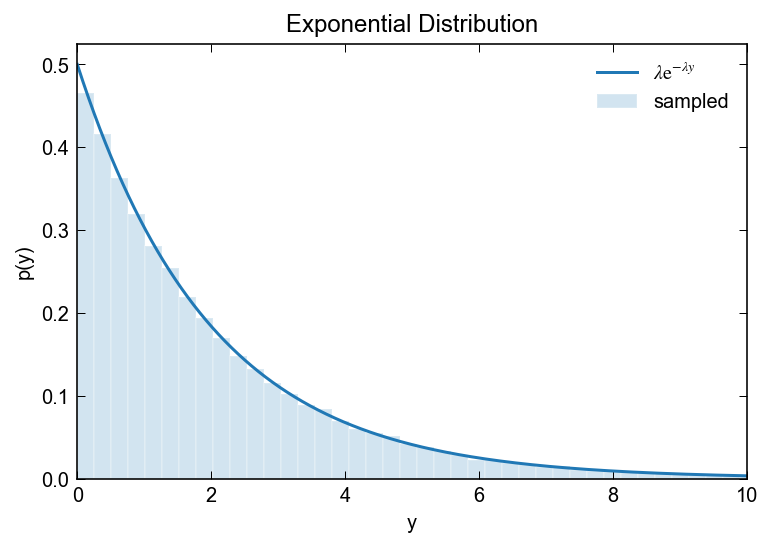

In [6]:
def p(y,λ):
    return λ*np.exp(-λ*y)

N = 100000
λ = 0.5
y = np.linspace(0,100,N)
plt.figure()
plt.plot(y,p(y,λ),color=colors[0], label=r'$\lambda \mathrm{e}^{-\lambda y}$')

# sample y from a uniform x
x = np.random.random(N)
sampled_y = -(1/λ)*np.log(1.0-x)
#sampled_y = -(1/λ)*np.log(x) #ln(x) also works since x is uniformly distributed between 0 and 1

plt.hist(sampled_y, bins=100, normed=True, ec='w', label='sampled', fc=colors[0], alpha=0.2);
plt.xlim(0,10);
plt.xlabel('y')
plt.ylabel('p(y)')
plt.title('Exponential Distribution')
plt.legend(loc='upper right')

## Gaussian Distributed Random Numbers

Consider the normal or Gaussian probability distribution with mean $\mu=0$:

\begin{equation}
p_n(y) = \frac{1}{\sqrt{2\pi\sigma^2}} \mathrm{e}^{-y^2/2\sigma^2}.
\end{equation}

The cumulative distribution function for this case is 

\begin{align*}
P_n(y) &= \int_{-\infty}^{y} p_n(y') \newline
&=\frac{1}{2}\left[1 + \mathrm{erf}\left(\frac{y}{\sqrt{2} \sigma}\right) \right]
\end{align*}

which cannot be analytically inverted.  However, we can use the same trick that is used to evaluate Gaussian integrals, i.e. extending our calculation to higher dimensions.  In this case, that means considering the multivariate probability distribution:

\begin{equation}
p_n(x,y) = p_n(x)p_n(y) = \frac{1}{2\pi\sigma^2} \mathrm{e}^{-(x^2+y^2)/2\sigma^2}.
\end{equation}

Let us transform to polar coordinates defined by:

\begin{align*}
r &= \sqrt{x^2+y^2} \newline
\theta &= \tan^{-1} \left(\frac{y}{x}\right)
\end{align*}

thus:

\begin{equation}
p_n(x,y)dx dy = \frac{1}{2\pi\sigma^2} \mathrm{e}^{-r^2/2\sigma^2} r dr d\theta .
\end{equation}

Defining

\begin{equation}
\rho = \frac{r^2}{2\sigma^2}  \Rightarrow d\rho = \frac{r dr}{\sigma^2}
\end{equation}

we have:

\begin{align*}
x &= \sqrt{2\rho}\sigma \cos\theta \newline
y &= \sqrt{2\rho}\sigma \sin\theta \newline
\end{align*}

and

\begin{equation}
p_n(x,y)dx dy = \frac{1}{2\pi} \mathrm{e}^{-\rho} d\rho d\theta .
\end{equation}

We know how to sample both scaled uniform random numbers $\theta \in \mathcal{U}_{[0,2\pi]}$ and exponentially distributed random numbers $\rho \in \mathrm{e}^{-\rho}$.  Therefore we can write:

\begin{align*}
x &= \sqrt{-2\ln(1-x_1)}\sigma \cos(2\pi x_2) \newline
y &= \sqrt{-2\ln(1-x_1)}\sigma \sin(2\pi x_2)
\end{align*}

where $x_1,x_2 \in \mathcal{U}_{[0,1)}$, i.e. 2 uniformly distributed random numbers can be used to get two Gaussian distributed random numbers.  This is known as the **Box-Muller** method.

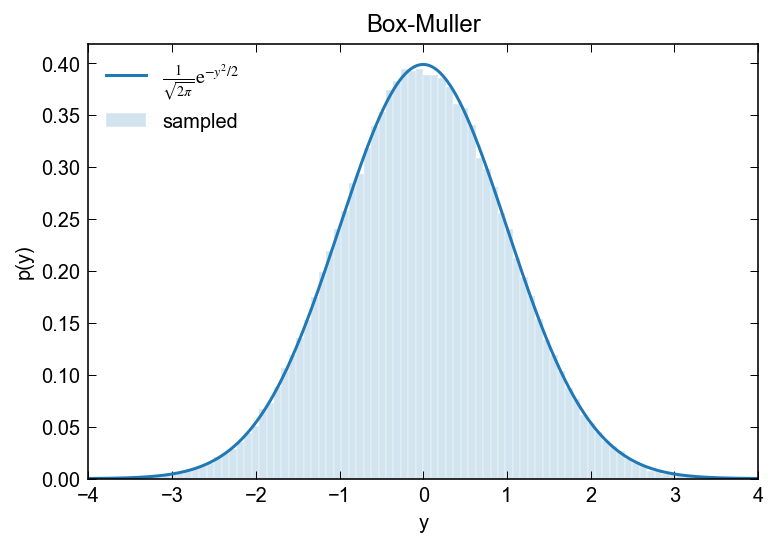

In [7]:
from scipy.constants import pi as π
N = 100000

# our uniform random numbers
x1 = np.random.random(N)
x2 = np.random.random(N)

# generate the Box-Muller values
x = np.sqrt(-2.0*np.log(1-x1))*np.cos(2.0*π*x2)
y = np.sqrt(-2.0*np.log(1-x1))*np.sin(2.0*π*x2)

# combine them into 1 array
r = np.hstack([x,y])

# produce a plot comparing with the actual distribution
px = np.linspace(-4,4,1000)
plt.figure()
plt.plot(px,np.exp(-px**2/2)/np.sqrt(2*π), color=colors[0], label=r'$\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-y^2/2}$')
plt.hist(r, bins=100, normed=True, ec='w', label='sampled',fc=colors[0], alpha=0.2)
plt.xlabel('y')
plt.ylabel('p(y)')
plt.xlim(-4,4)
plt.title('Box-Muller')
plt.legend(loc='upper left')

## Rejection Sampling

<img src="data/rejection.svg" width=600px>

What do we do if we can't invert the cumulative distribution function and we are out of tricks?  The technique, known as **von Neumann rejection** is similar to how we computed $\pi$ by throwing stones into a pond.  

Consider some probability distribution function $p(x)$ whose cumulative distribution function $P(x)$ cannot be inverted.  Suppose we want to sample this function over the finite range $[x_{\rm min},x_{\rm max}]$ where $p_{\rm max}$ is the maximal value of $p(x)$ on this interval.  Then we can:

1. Generate a sequence of $N$ uniformly distributed random numbers $x_i \in \mathcal{U}_{[x_{\rm min},x_{\rm max}]}$
2. Generate a second sequence of $N$ uniformly distribted random numbers $y_i \in \mathcal{U}_{[0,p_{\rm max}]}$
3. Keep only those elements in the first sequence $x_i$ that have $y_i < p(x_i)$

The resulting set of $x_j$ values will be distributed according to $p(x)$.   This works by throwing away unlikely results.

<br />
<div class="span alert alert-warning">
Note: Our probability distribution must be bounded and have a finite range. 
</div>

Easiest to understand via an example.

### Example
Sample $N=10^4$ random numbers from the function:

\begin{equation}
f(x) = \frac{1}{\sqrt{\cosh(x)}}
\end{equation}

on the region $[-5,5]$.

#### Step 1: at present, $f(x)$ it not normalized so we need to turn it into a probability distribution.

In [8]:
from scipy import integrate

def f(x):
    return 1.0/np.sqrt(np.cosh(x))

def p(x, xmin=-5, xmax=5):
    norm = integrate.quad(f, xmin, xmax)[0]
    return f(x)/norm

#### Step 2: determine the maximual value of $p(x)$ on the interval

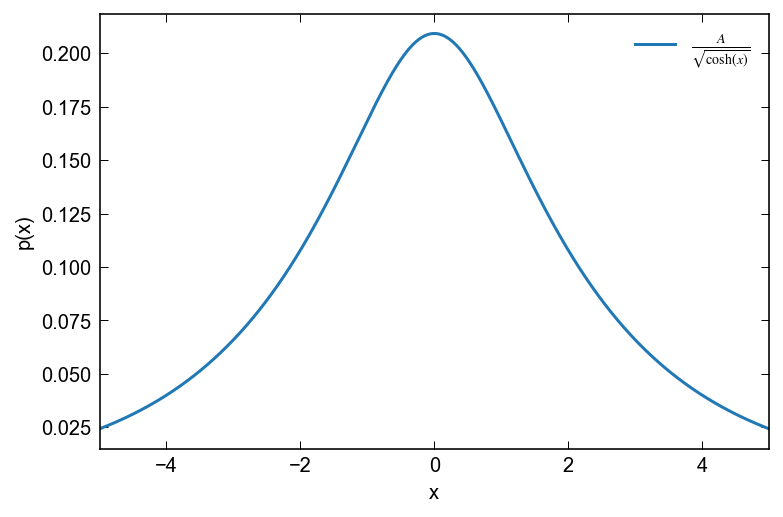

In [9]:
# Let's start by plotting
xmin = -5
xmax = 5
px = np.linspace(xmin,xmax,1000)
plt.figure()
plt.plot(px,p(px), color=colors[0], label=r'$\frac{A}{\sqrt{\cosh(x)}}$')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-5,5);
plt.legend()

Thus, the maxima will appear at $x=0$.

In [13]:
print('p(0) = ',p(0))

p(0) =  0.209214897642


#### Step 3: Generate the two lists of random numbers

In [14]:
N = 10**5
x = xmin + (xmax-xmin)*np.random.random(N) # random numbers between xmin and xmax
y = p(0)*np.random.random(N) # random numbers up to the max of our desired distribution

#### Step 4: perform the rejection

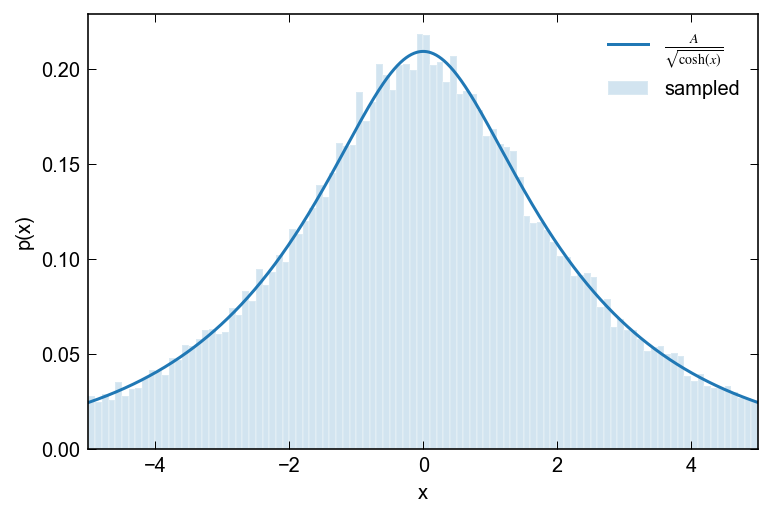

In [15]:
accepted = np.array([])
for i in range(N):
    if y[i] < p(x[i]):
        accepted = np.append(accepted,x[i])
        
plt.figure()
plt.plot(px,p(px),color=colors[0], label=r'$\frac{A}{\sqrt{\cosh(x)}}$')
plt.hist(accepted, bins=100, normed=True, ec='w', label='sampled', fc=colors[0], alpha=0.2)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.xlim(-5,5);
plt.legend()